# (3.12) Exercise:

1. Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set)
2. Perform a similar alanlaysis as above on this dataset with the following sections:
* High level statistics of the dataset: number of points, numer of   features, number of classes, data-points per class.
* Explain our objective. 
* Perform Univaraite analysis(PDF, CDF, Boxplot, Voilin plots) to understand which features are useful towards classification.
* Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classfication.
* Write your observations in english as crisply and unambigously as possible. Always quantify your results.

In [111]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

haber = pd.read_csv("haberman.csv")
haber.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


# (3.1)Number of Data Points:

In [112]:
haber.shape #We have 306 rows and 4 columns along with the class label

(306, 4)

#  (3.2)Number of Features:

In [113]:
haber.columns #We have 3 featues and 1 class label

Index(['age', 'year', 'nodes', 'status'], dtype='object')

## Description of Features
    1.Age : Age of patient at time of operation (numerical).
    2.Year : Patient's year of operation (numerical).
    3.Nodes : Number of positive axillary nodes detected(numerical)(The axillary nodes are a group of lymph nodes located in the axillary (or armpit) region of the body. They perform the vital function of filtration and conduction of lymph)
    4.Status : Survival status (class attribute) 
                # 1 = the patient survived 5 years or longer.
                # 2 = the patient died within 5 years.

# (3.3) Number of classes

In [114]:
haber.status.value_counts() 
# There are two classes:
    #1. There 225 patients who survived 5 years or longer
    #2. There are 81 patients who died within 5 years

1    225
2     81
Name: status, dtype: int64

In [115]:
#Since the class label classifies two things i.e survived or not ,we can convert 1 and 2 values to "yes" and "No" respectively
hab = haber
haber.status[haber.status == 1] = "yes"
haber.status[haber.status == 2] = "no"
haber.head(10)

,age,year,nodes,status
0,30,64,1,yes
1,30,62,3,yes
2,30,65,0,yes
3,31,59,2,yes
4,31,65,4,yes
5,33,58,10,yes
6,33,60,0,yes
7,34,59,0,no
8,34,66,9,no
9,34,58,30,yes


# (3.4) Data-points per class.

In [116]:
haber['status'].value_counts()
# yes = 225
# no = 81

yes    225
no      81
Name: status, dtype: int64

# (4) Objective:
    # Given any new features i.e 'age','year','nodes' , we have to classify wheather 
        # "yes": A patient would survive more than 5 years.
        # "no": A patient would die within 5 years.

# (6.1) 2-D Scatter Plot


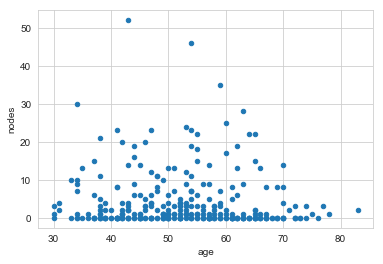

In [117]:
haber.plot(x='age',y='nodes',kind='scatter')
# We cannot infer much from this plot ,so lets try coloring them based on class label using seaborn

# (6.2) 2-D Scatter Plot using color coding for each "STATUS" class:

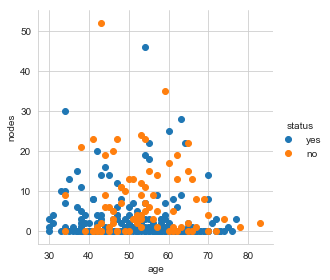

In [179]:
sns.FacetGrid(haber,hue='status',height=4)\
   .map(plt.scatter,"age","nodes")\
   .add_legend()
plt.show()
# plotting 2-d scatter plot on "year" and "nodes".

# (6.3) Pair Plots:

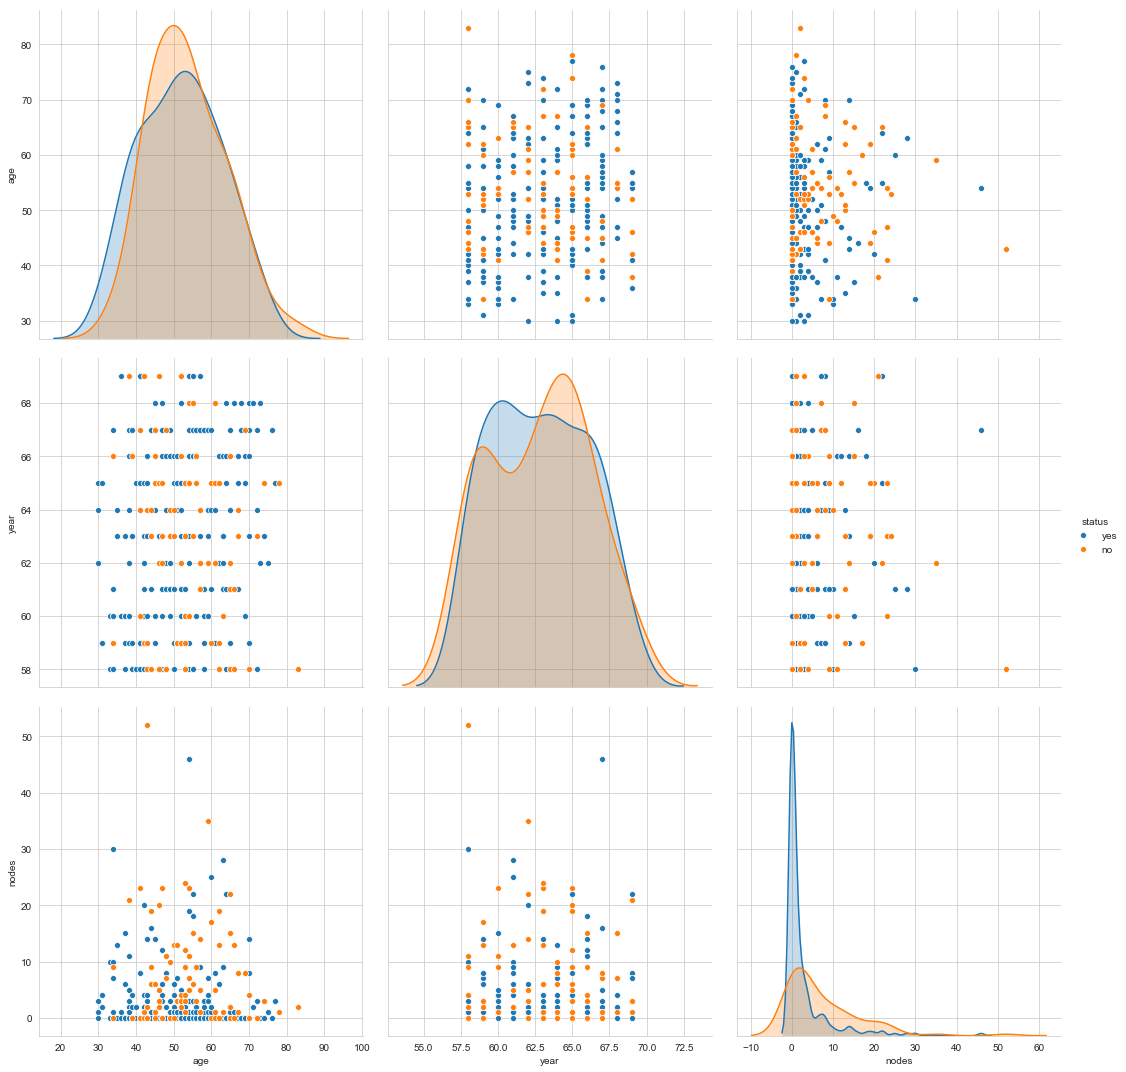

In [155]:
sns.set_style("whitegrid");
sns.pairplot(haber,hue='status',height=5)
# Let's try to visualize between all the plots i.e 3C2 = 3 plots ,We'll observe the 3 plots above the diagonal elements below

### Observations(approx):
    # Almost all the plots are overlapped ,but still we can make some conclutions from them:
    #1.If we see the plot between age and nodes ,if no. of axillary nodes in between 10-20 and age between 30-40,we can observe that only 3 of the patients did not survive ,but rest of them survived.

# Lets now see the Univaraite analysis i.e using one feature at a time:

# (5.1) 1-D Scatter plot

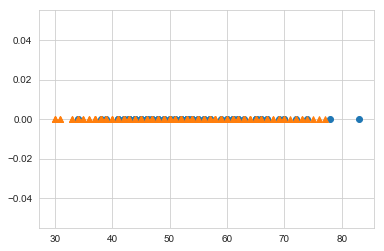

In [132]:
# Lets see 1-D Scatter plot
haber_yes = haber[haber['status']=='yes']
haber_no = haber[haber['status']=='no']
plt.plot(haber_no['age'],np.zeros_like(haber_no['age']),'o')
plt.plot(haber_yes['age'],np.zeros_like(haber_yes['age']),'^')

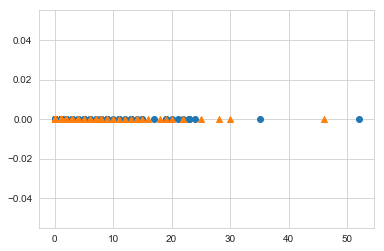

In [133]:
plt.plot(haber_no['nodes'],np.zeros_like(haber_no['nodes']),'o')
plt.plot(haber_yes['nodes'],np.zeros_like(haber_yes['nodes']),'^')

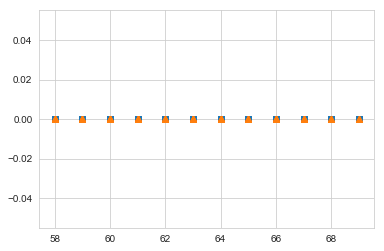

In [122]:
plt.plot(haber_no['year'],np.zeros_like(haber_no['year']),'s')
plt.plot(haber_yes['year'],np.zeros_like(haber_yes['year']),'^')

### Observations:
    1.By using 1-D scatter plot we cannot see even any small usefull information as both the classes are almost completely               overlapped

# (5.2) Histograms and PDF:

C:\Users\LENOVO\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


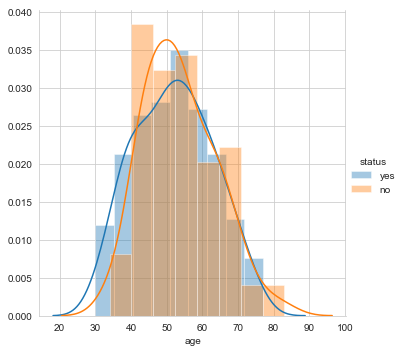

In [160]:
sns.FacetGrid(haber, hue="status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.show();


### Observations(approx):
    1.The probability of patients surviving between the age 51 and 55 is more than not suviving
    2.The probability of patients not surviving between the age 40 and 45 is more than suviving

C:\Users\LENOVO\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


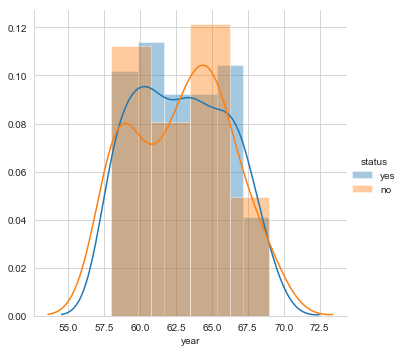

In [162]:
sns.FacetGrid(haber, hue="status", size=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.show();

### Observations(approx):
    1.The probability of patients surviving between the years 1960 and 61 is more
    2.The probability of patients not surviving between the years 1963 and 66 is more

C:\Users\LENOVO\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


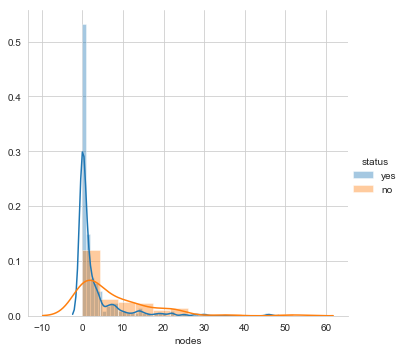

In [164]:
sns.FacetGrid(haber, hue="status", size=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.show();

### Observations(approx):
    1.The probability of patients surviving who have axilliary nodes=1 is more
    2.The probability of patients not surviving who have axilliary nodes between 0-5 is more

# (5.3) PDF and CDF

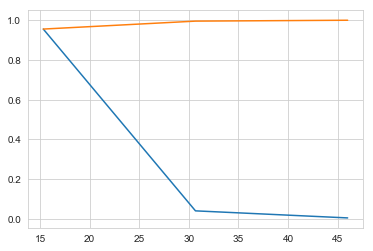

In [172]:
# For Status="yes"
counts,bin_edges = np.histogram(haber_yes['nodes'],bins=3,density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

# # For Status="no"
# counts,bin_edges = np.histogram(haber_no['nodes'],bins=10,density=True)
# pdf = counts/sum(counts)
# cdf = np.cumsum(pdf)
# plt.plot(bin_edges[1:],pdf)
# plt.plot(bin_edges[1:],cdf)

### Observations:
    1.Orange line is CDF and Blue line is PDF
    2.The probability of finding auxillary nodes greater than 30 is less than 0.05 

# (5.4) Box and Violen PLots

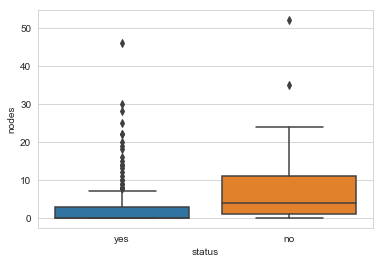

In [176]:
sns.boxplot(x='status',y='nodes',data=haber)

### Observations:
    1.For the Class "NO" ,most of the points lie in between 50th%-75th%,so,most of the patients who have axillary nodes >5           and<11 have high chances of not surviving

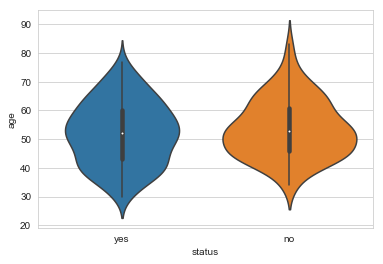

In [153]:
sns.violinplot(x='status',y='age',data=haber)

### Overall Observations:
    1.There 225 patients who survived 5 years or longer and There are 81 patients who died within 5 years
    2.The no. of unique years are 12
    3.If we see the plot between age and nodes ,if no. of axillary nodes in between 10-20 and age between 30-40,we can observe       that only 3 of the patients did not survive ,but rest all of them survived.
    4.Below table gives some statistical analysis on features : age,year,nodes

In [178]:
haber.describe()

,age,year,nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000
